# Diagnosing Diabetes - Exploratory Data Analysis (EDA)

### Table of Contents

* [0. Goals](#Goals)
* [1. Data](#Data)
    * [1.1 Overview](#section1_1)
    * [1.2 Data Description](#section1_2)
    * [1.3 Data Summary](#section1_3)
* [2. Data Cleaning](#cleaning)
    * [2.1 Missing Values](#section2_1)
        * [2.1.1 Impute Missing Values](#section2_1_1)
    * [2.2 Outliers](#section2_2)
        * [2.2.1 Insulin](#section2_2_1)
        * [2.2.2 SkinThickness](#section2_2_2)
        * [2.2.3 Pregnancies](#section2_2_3)
* [3. Exploratory Data Analysis](#EDA)

    

## 0. Goals <a class="anchor" id="Goals"></a>

This notebook presents an examination of a diabetes dataset obtained from the National Institute of Diabetes and Digestive and Kidney Diseases, which can be found on [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

The objectives of this project were to:

* Familiarize with the data
* Prepare the data for analysis by cleaning it
* Formulate relevant questions for further analysis
* Analyze the variables within the data to uncover patterns and insights related to these questions.

## 1. Data <a class="anchor" id="Data"></a>

The dataset for this project was downloaded from Kaggle, which contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skinfold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- `Age`: Age (years)
- `Outcome`: Class variable (0 if non-diabetic, 1 if diabetic)

### 1.1 Overview <a class="anchor" id="section1_1"></a>

To begin, the necessary libraries are imported into the notebook. Following that, the dataset will be imported and loaded into a pandas dataframe for further manipulation and analysis.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in data
diabetes_data = pd.read_csv('diabetes.csv')

# view the data
pd.set_option('display.max_columns', None)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset comprises several independent medical predictor variables and one dependent target variable, `Outcome`.

Now let's look at the shape of the data.

In [3]:
# data shape
print(f'Shape of the data: {diabetes_data.shape}')

Shape of the data: (768, 9)


### 1.2 Data Description <a class="anchor" id="section1_2"></a>

Before starting the data cleaning process, it is important to understand the types of data we are working with. 

The `.info()` method of the dataframe can be used to display the data types of each column, and the `.isnull()` method will inform us of any missing or null values. This will give us a better idea of what data cleaning and preprocessing steps are necessary.

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
# check for null values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The `.isnull()` function returns no null values; however, the data is still at risk of having missing data. 

Summary statistics will be examined to identify anomalies in the data.

In [6]:
# perform summary statistics
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

The minimum values of `0.0` suggests the presence of missing data for these variables:

* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`

However, it is important to note that the values of `Pregnancies` and `DiabetesPedigreeFunction` may be legitimately equal to zero and should not be considered as missing values.

In addition to missing data, the dataset also contains some outliers that should be taken into consideration.

* The `Insulin` maximum level  of `846` is significantly higher than the normal range of `16`-`166` for 2-hour serum insulin levels.
* The maximum value of `17` for the `Pregnancy` variable is not impossible, but it may be worth investigating to confirm its accuracy.
* The maximum value of `99` for `SkinThickness` is also worth looking into.

### 1.3 Data Summary <a class="anchor" id="section1_3"></a>

To summarize the insights discovered thus far:

* The dataset contains 9 columns and 768 rows.
* The names and data types of each column have been identified. Most values are integers, except for `BMI` (float),  `DiabetesPedigreeFunction` (float) and `Outcome` (object).
    * `Outcome` is expected to be an integer, but the data type is currently listed as `object`. Further investigation is needed to understand why this is the case.
* No null values have been found in the data, but there are missing values that will be replaced with the mean value of each feature.
* Outliers have been identified in the `Insulin`, `SkinThickness` and `Pregnancy` variables and will need to be further investigated.

## 2. Data Cleaning <a class="anchor" id="cleaning"></a>

### 2.1 Missing Values <a class="anchor" id="section2_1"></a>

As mentioned before, there are possible several missing values in the dataset that should be handled. To do this, the following will be done:

* Replace instances of `0` with `NaN` to get a more accurate view of the missing values
* Check for missing (null) values again to see the total number of missing values
* If the number of records with missing values are significant, impute instances of `NaN` with the mean value of each attribute using the `.mean()` method

In [7]:
def replace_zero(df, columns):
    """replace instances of 0 with NaN"""
    df[columns] = df[columns].replace(0, np.NaN)
    
    return df[columns]

replace_zero(diabetes_data, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [8]:
# bar plot of missing values
def null_plot (dataset):
    """Creates a bar plot of missing values"""
    # df of count of null values in each feature  
    count_null = dataset.isnull().sum()
    count_null_df = pd.DataFrame(count_null, columns = ['Count'])
    
    # create bar plot
    plt.figure(figsize=(10, 7))
    sns.barplot(x = count_null_df.index, y = count_null_df['Count'], color='lightblue')
    
    # add the total count on top of each bar
    for i in range(len(count_null_df)):
        plt.annotate(str(count_null_df['Count'][i]), xy=(i, count_null_df['Count'][i]), xytext=(0, 3), 
                        textcoords="offset points", ha='center', va='bottom')
    
    # set x-axis labels 
    plt.xticks(rotation=45)

    # set y-axis label
    plt.ylabel('Count')
    
    # set title
    plt.title('Count of Missing Value')
    
    plt.show()

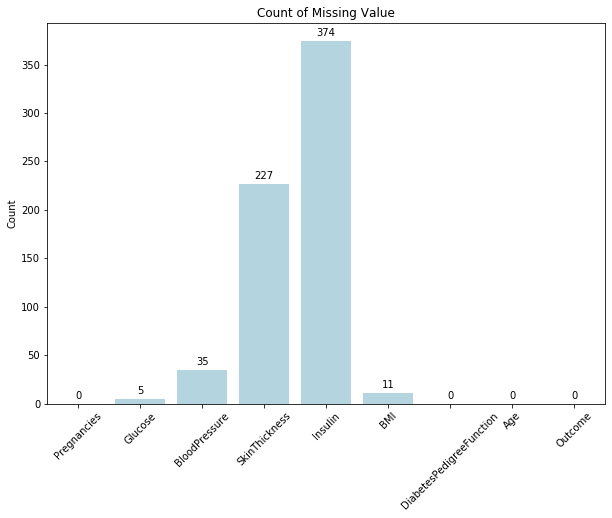

In [9]:
null_plot(diabetes_data)

The majority of missing (null) values are under the `SkinThickness` and `Insulin` features, with `227` and `374` records 

We will take a closer look at these rows to get a better idea of _why_ some data might be missing.

In [10]:
# print rows with missing values
print(diabetes_data[diabetes_data.isnull().any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age Outcome  
0                       0.627   50       1  
1                    

Almost all rows with missing data have missing values in more than one feature. In fact, every single row with at least one missing value also has a missing value in the `Insulin` column.

Hence, we can make an assumption that perhaps if a patient did not have their insulin level measured, they might also not have ahd the other measurements taken. 

Since the number of rows with missing values are fairly high (48% -- 376 out of 768 rows), we will impute the missing data with the median value by target for the following features:

* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`

#### 2.1.1 Impute Missing Values <a class="anchor" id="section2_1_1"></a>

Before proceeding to impute missing values with the mdeian value by target, let's take a look at the target variable `Outcome`.


In [11]:
# view data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


As mentioned before, the `Outcome` variable data type is an `object` type while it should be an `int64` instead. To understand why this is the case, let's look at the unique values of `Outcome`.

In [12]:
# list of unique values of Outcome column
print(diabetes_data.Outcome.unique().tolist())

['1', '0', 'O']


It appears that there are instances of letter `'O'` values that should have been the number `0` instead. 

To solve this issue, we will replace instances of `'O'` with `0` using the `.replace()` function and convert all values to integers using the `.to_numeric` function in pandas.

In [13]:
def replace_column_value(df, column_name, old_value, new_value):
    """
    Replaces all occurrences of a specific value in a column of a DataFrame with a new value
    :param df: DataFrame to be modified
    :param column_name: name of the column to be modified
    :param old_value: value to be replaced
    :param new_value: new value to replace old value
    """
    df[column_name] = pd.to_numeric(df[column_name].replace(old_value, new_value), errors='coerce') 

In [14]:
replace_column_value(diabetes_data, 'Outcome', 'O', 0)

print(diabetes_data.Outcome.unique().tolist())

[1, 0]


Now that we've tackled the `Outcome` variable, let's dive into the imputation part.

First, we will identify the columns with at least one missing value in the dataframe. 

In [15]:
def get_null_columns(df):
    """Gets list of columns with missing values"""
    # check for null values
    null_columns = df.isnull().sum()
    
    # get list of cols with at least 1 null value
    null_columns = null_columns.loc[null_columns > 0].index.tolist()
    
    return null_columns

null_vars = get_null_columns(diabetes_data)
print(null_vars)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


Next, we will calculate the median based on the target variable `Outcome`.

In [16]:
def calculate_median_vars(df, target_var, independent_vars):
    median_values = {}
    
    for var in independent_vars:
        # Group the DataFrame by the target variable and calculate the median of the independent variable
        median_values[var] = df.groupby(target_var)[var].median().to_dict()
    
    return median_values

In [17]:
median_values = calculate_median_vars(diabetes_data, 'Outcome', null_vars)
print(median_values)

{'Glucose': {0: 107.0, 1: 140.0}, 'BloodPressure': {0: 70.0, 1: 74.5}, 'SkinThickness': {0: 27.0, 1: 32.0}, 'Insulin': {0: 102.5, 1: 169.5}, 'BMI': {0: 30.1, 1: 34.3}}


Let's take a look at the median values by target for each independent variables, categorized by 0-Non-Diabetic and 1-Diabetic:

In [18]:
def create_median_table(median_values, target_var, independent_vars):
    """Creates a table of median values by target and independent variables"""
    median_table = pd.DataFrame(columns=['Variable', 'Non-Diabetic Median', 'Diabetic Median'])
    
    for var in independent_vars:
        median_table = median_table.append({'Variable': var, 'Non-Diabetic Median': median_values[var][0], 'Diabetic Median': median_values[var][1]}, ignore_index=True)
    
    return median_table

In [19]:
create_median_table(median_values, 'Outcome', null_vars)

,Variable,Non-Diabetic Median,Diabetic Median
0,Glucose,107.0,140.0
1,BloodPressure,70.0,74.5
2,SkinThickness,27.0,32.0
3,Insulin,102.5,169.5
4,BMI,30.1,34.3


Using the newly computed median values above, we'll proceed to impute the missing values based on the target for each feature with missing value(s).

In [20]:
def impute_missing_values(df, target_var, independent_vars):
    for var in independent_vars:
        for target_val in [0,1]:
            median = median_values[var][target_val]
            df.loc[(df[var].isnull()) & (df['Outcome'] == target_val), var] = median
    return df

In [21]:
diabetes_imputed_data = impute_missing_values(diabetes_data, 'Outcome', null_vars)

diabetes_imputed_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [22]:
# review summary statistics
print(diabetes_imputed_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  

### 2.2 Outliers  <a class="anchor" id="section2_2"></a>

#### 2.2.1 Insulin <a class="anchor" id="section2_2_1"></a>

As previously stated, our dataset contains some outliers, particularly in the Insulin and SkinThickness variables. 

To more effectively identify these outliers, we will be analyzing the data using box plots for both variables.

In [23]:
def create_box_plot(df, var, color='lightblue'):
    plt.figure(figsize = (15,5))
    sns.boxplot(data = df, x = var, color=color, showmeans=True, meanline=True)
    plt.xlabel(var)
    plt.title(f'{var} Distribution')
    plt.show()

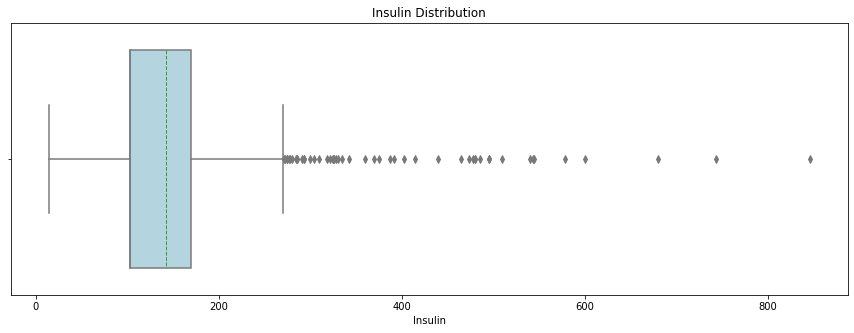

In [24]:
# box plot of insulin level
create_box_plot(diabetes_imputed_data, 'Insulin')

The plot indicates that insulin levels are heavily skewed to the left, with a noticeable lack of higher values. 

It's worth mentioning that 2-hour serum insulin levels exceeding 600 mu U/ml are extremely uncommon, as the typical range for 2-hour post-glucose insulin is between 16-166 mu U/ml. Therefore, we will be eliminating any outliers above 600 mu U/ml.

In [25]:
# remove outliers by keeping values less and equal to 600
diabetes_imputed_data = diabetes_imputed_data[diabetes_imputed_data['Insulin'] <= 600]

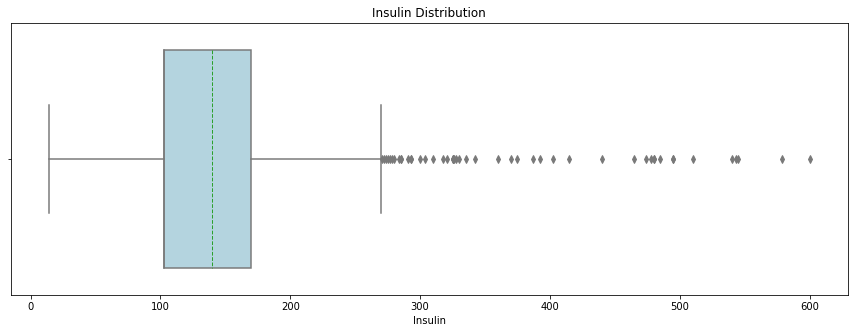

In [26]:
# box plot of insulin level
create_box_plot(diabetes_imputed_data, 'Insulin')

#### 2.2.2 SkinThickness <a class="anchor" id="section2_2_2"></a>

Similarly, we will examine the distribution of the `SkinThickness` feature.

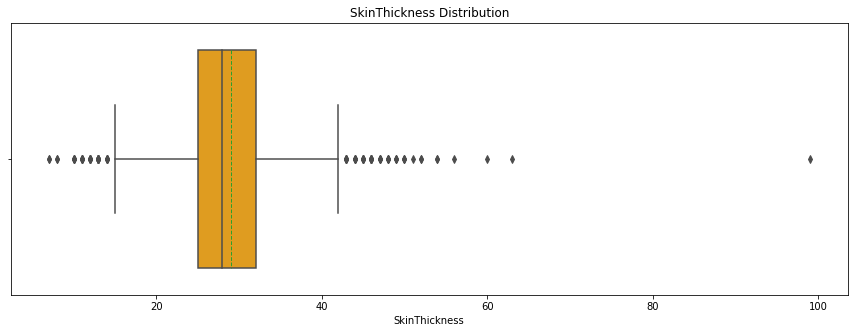

In [27]:
create_box_plot(diabetes_imputed_data, 'SkinThickness', 'orange')

We also notice that the distribution for `SkinThickness` is also skewed to the left, but the number of outliers for this feature is visibly less than that of `Insulin`.

At first glance, it is apparent that there is one extreme outlier with value of `99` cm in the distribution. Hence, we will drop this record to keep the distribution more balanced.

In [28]:
# remove outliers by keeping values less and equal to 80
diabetes_imputed_data = diabetes_imputed_data[diabetes_imputed_data['SkinThickness'] <= 80]

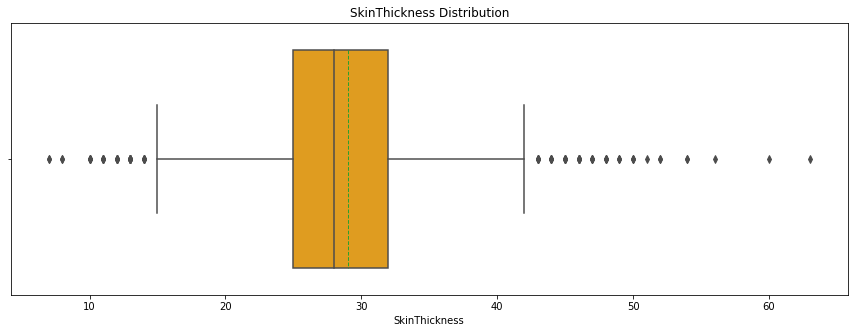

In [29]:
# box plot of skin thickness
create_box_plot(diabetes_imputed_data, 'SkinThickness', 'orange')

#### 2.2.3 Pregnancies <a class="anchor" id="section2_2_3"></a>

Let's also take a look at the distribution of the `Pregnancies` feature.

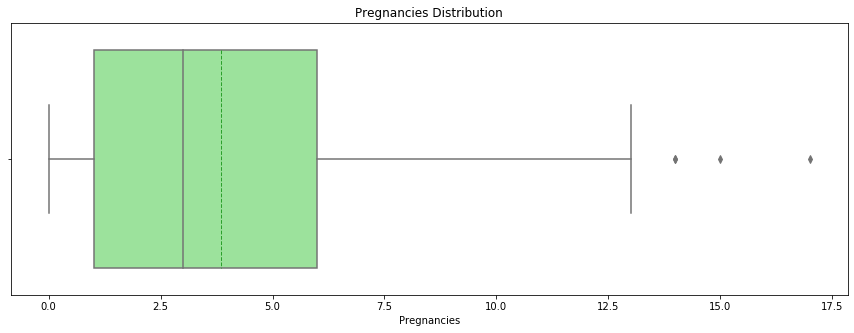

In [30]:
# box plot of pregnancy
create_box_plot(diabetes_imputed_data, 'Pregnancies', 'lightgreen')

For this analysis, we will be removing the `Pregnancies` values greater than 13.

In [31]:
# remove outliers by keeping values less and equal to 13
diabetes_imputed_data = diabetes_imputed_data[diabetes_imputed_data['Pregnancies'] <= 13]

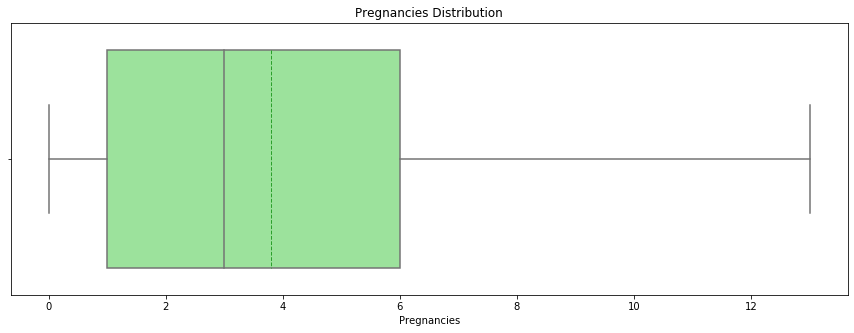

In [32]:
# box plot of pregnancy
create_box_plot(diabetes_imputed_data, 'Pregnancies', 'lightgreen')

Now that we're done with the outliers, let's check the shape of our data frame again.

In [33]:
print(f'Data Shape: {diabetes_imputed_data.shape}')

Data Shape: (760, 9)


## 3. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After thorough data cleaning and preprocessing, the diabetes data is now prepared for exploratory data analysis.

### 3.1 Big Picture <a class="anchor" id="section3_1"></a>

In order to decide which variables will be the main focus of our analysis, we will observe how the variables correlate to one another.  

In [34]:
def create_corr_plot(df, method='pearson'):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(method=method), annot=True, cmap='YlOrBr', fmt='.2f')
    plt.title('Diabetes Correlation Plot')
    plt.show()

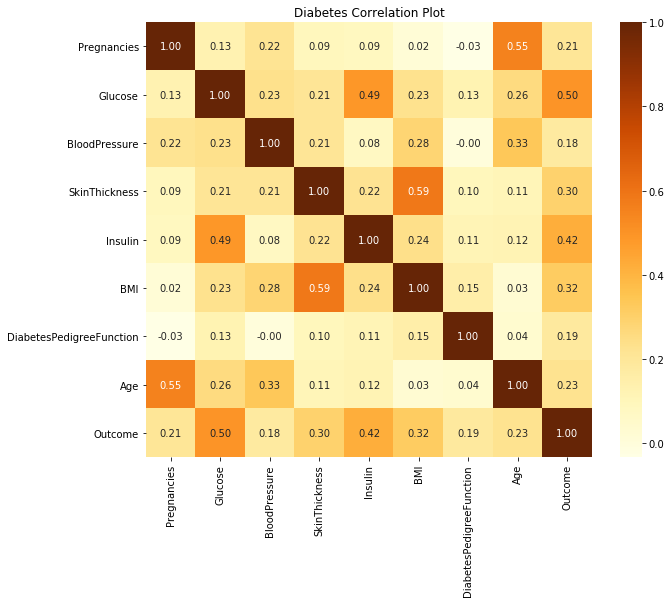

In [35]:
create_corr_plot(diabetes_imputed_data)